In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

In [31]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen = 512)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen = 512)

In [32]:
model = keras.Sequential([
    layers.Embedding(input_dim = 10000, output_dim = 10, input_length = 256),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16,activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:



histroy = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose = 1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9333 - loss: 0.1814 - val_accuracy: 0.8904 - val_loss: 0.2789
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9332 - loss: 0.1702 - val_accuracy: 0.8852 - val_loss: 0.2932
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9366 - loss: 0.1661 - val_accuracy: 0.8932 - val_loss: 0.2816
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9438 - loss: 0.1546 - val_accuracy: 0.8126 - val_loss: 0.5128
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9286 - loss: 0.1814 - val_accuracy: 0.8926 - val_loss: 0.2942
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9398 - loss: 0.1557 - val_accuracy: 0.8358 - val_loss: 0.4211
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9483 - loss: 0.1398 - val_accuracy: 0.8858 - val_loss: 0.3067
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9456 - loss: 0.1398 - val_accuracy: 0.

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8401 - loss: 0.4509
Test accuracy: 0.8420400023460388


In [43]:
prediction = model.predict(X_test[: 10])
print('prediction', prediction)
print('actucal label: ', y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
prediction [[0.63567895]
 [0.9999966 ]
 [0.87841713]
 [0.70837986]
 [0.9993323 ]
 [0.96250314]
 [0.9998235 ]
 [0.01347131]
 [0.9989985 ]
 [0.99986964]]
actucal label:  [0 1 1 0 1 1 1 0 0 1]


In [45]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9397 - loss: 0.1502 - val_accuracy: 0.8886 - val_loss: 0.3103
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9691 - loss: 0.0984 - val_accuracy: 0.8936 - val_loss: 0.3093
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9715 - loss: 0.0971 - val_accuracy: 0.8872 - val_loss: 0.3151
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9729 - loss: 0.0922 - val_accuracy: 0.8940 - val_loss: 0.3111
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9701 - loss: 0.0933 - val_accuracy: 0.8932 - val_loss: 0.3114
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9713 - loss: 0.0934 - val_accuracy: 0.8886 - val_loss: 0.3140
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9695 - loss: 0.0962 - val_accuracy: 0.8906 - val_loss: 0.3143
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9690 - loss: 0.0970 - val_accuracy: 0.8878 - v

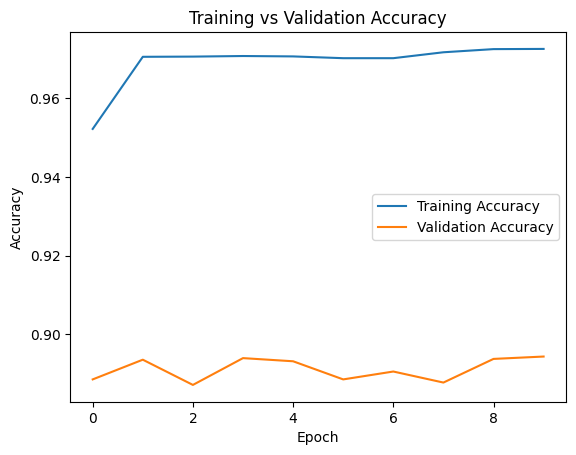

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
